# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ It should be noted that we are calculating the mean and standard deviation of this sample of hospital patients. Based on the hospital administrator's questions, it seems like he would like to use this sample containing 1338 to infer a larger population of medical of the entire hospital (stated in Q2). Making that calculation would mean we need to treat the sample differnently, using degrees of freedom and a t-test instead of a normal parametric confidence interval test.

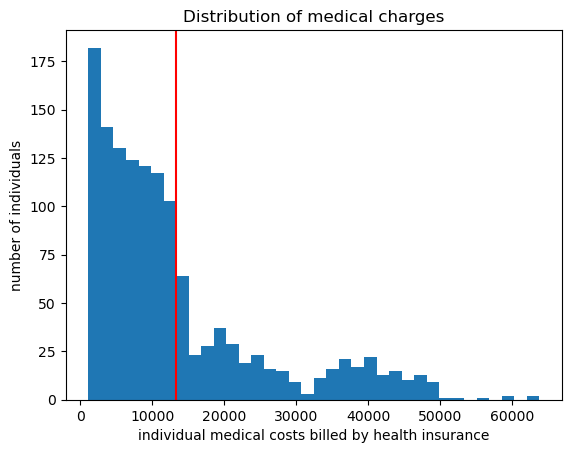

mean: 13270.422265141257
standard deviation: 12110.011236693994


In [15]:
_ = plt.hist(medical['charges'], bins=int(np.sqrt(1338)))
_ = plt.xlabel('individual medical costs billed by health insurance')
_ = plt.ylabel('number of individuals')
_ = plt.title('Distribution of medical charges')
_ = plt.axvline(np.mean(medical['charges']), color='r')
plt.show()

mean = np.mean(medical['charges'])
std = np.std(medical['charges'], ddof=1)

print(f"mean: {mean}\nstandard deviation: {std}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

With 1,338 records available, we can take a random sample of say, 25 and perform a hypothesis T test. We could test to see if 12,000 is statistically significant, given a sample mean 13270 and sample standard deviation 12105. A two-tailed test can be performed.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case, the null hypothesis $H_0$ will be that revenue has not fallen below a certain threshold. A one-sided test is most relevant for the problem at hand for two reasons. The first reason is because revenue has indeed fallen, so the administrator wants to be assured that charges have fallen below the 12,000 threshold. The second reason why is that this one-sided t-test has greater odds of producing a statistically significant result, in which case $H_0$ is rejected in favor of the alternative hypothesis $H_1$: charges have fallen due to business circumstances and not just by chance. The ramifications of this being that the hostital administrator is very concerned about there being true revenue loss at stake, therefore they will not mind being even more proactive about managing the business.

In [11]:
seed(42)

mean = np.mean(medical['charges'])
std = np.std(medical['charges'], ddof=1)

lower = t.ppf(.025, df = 1337, loc=mean, scale=std)
upper = t.ppf(.975, df = 1337, loc=mean, scale=std)
middle = t.ppf(.5, df=1337, loc=mean, scale=std)
print("t test:")
print(lower, upper, middle, mean, std)

t test:
-10486.269829285808 37027.11435956831 13270.422265141257 13270.422265141257 12110.011236693994


By way of the t-test, it it can be said with 95% confidence that the average <em>actual charge</em> lies somewhere between \\$-10,486 and \\$37,027. This absurdly wide range could have something to do with the underlying distribution--it is highly skewed to the right, with some charges of \\$60k and more. That being said, with the current results of our test, the administrator should not be concerned because \\$12,000 falls within the range.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ $H_0$: There is no difference that people with or without insurance pay in charges.
$H_1$: People with and without insurance pay different charges by an amount that could be considered statistically significant. The assumption we are making about the variances is that the random variables of both events (hospital charge with insurance and hospital charge without insurance) are independent and uncorrelated.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [41]:
insurance = medical[medical['insuranceclaim'] == 1]['charges'].values
no_insurance = medical[medical['insuranceclaim'] == 0]['charges'].values

In [42]:
print(insurance.shape, no_insurance.shape, no_insurance.shape[0]+insurance.shape[0])

(783,) (555,) 1338


In [27]:
insurance_mean = np.mean(insurance)
insurance_std = np.std(insurance)
no_insurance_mean = np.mean(no_insurance)
no_insurance_std = np.std(no_insurance)

In [28]:
print(insurance_mean, insurance_std, no_insurance_mean, no_insurance_std)

16423.928276537677 14036.956250260417 8821.421892306305 6440.699841605235


In [37]:
# manual calculation using formula
np.sqrt(
    ((782*(14037**2)) + (554*(6441**2)) ) 
    / (783 + 555 - 2)
)

11512.383758994974

In [53]:
t = (
    (16424 - 8821) 
    / (11512*np.sqrt((1/783)+(1/555)))
)
t

11.902372157115137

In [57]:
from scipy.stats import t
t.pdf(11.902372157115137, 1337, loc=0, scale=1)

2.1855521687605345e-30

In [54]:
ttest_ind(insurance, no_insurance, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test